In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Read the dataset
df = pd.read_csv('scaled_X_features.csv')

# Separate the features (X) and target variable (y)
X = df.drop('learning_style', axis=1)
y = df['learning_style']


# Create an instance of the SMOTE class
smote = SMOTE()

# Apply SMOTE on the entire dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



# Print the balanced class distribution
print('Original class distribution:', y.value_counts())
print('Resampled class distribution:', y_resampled.value_counts())


Original class distribution: 0    523
3    427
2     43
1      7
Name: learning_style, dtype: int64
Resampled class distribution: 0    523
3    523
2    523
1    523
Name: learning_style, dtype: int64


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np







# Define the parameter grid to search over
param_grid = {
    'n_neighbors': np.arange(1, 10),
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
    'leaf_size': np.arange(10, 51),
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create the KNN model
model = KNeighborsClassifier()

# Perform a grid search with cross-validation to find the best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid.best_params_
best_model = grid.best_estimator_

# Print the best hyperparameters and their corresponding score
print(f'Best Score: {grid_result.best_score_:.2f}')
print(f'Best Parameters: {grid_result.best_params_}')

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


Best Score: 0.85
Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       107
           1       0.98      1.00      0.99        95
           2       0.89      1.00      0.94       112
           3       0.79      0.80      0.79       105

    accuracy                           0.88       419
   macro avg       0.88      0.88      0.88       419
weighted avg       0.88      0.88      0.88       419



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(algorithm= 'ball_tree', leaf_size= 10, metric= 'euclidean', n_neighbors= 1, p= 1, weights= 'uniform')
classifier.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_predk = classifier.predict(X_test)
cm1 = confusion_matrix(y_test, y_predk)
print(cm1)
accuracy_score(y_test, y_predk)

[[ 77   1   6  23]
 [  0  95   0   0]
 [  0   0 112   0]
 [ 12   1   8  84]]


0.8782816229116945

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(algorithm= 'ball_tree', leaf_size= 10, metric= 'euclidean', n_neighbors= 1, p= 1, weights= 'uniform')

# Perform cross-validation using SMOTE-applied samples
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-validation scores:", scores)

# Compute the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean accuracy:", mean_accuracy)

print("Accuracy: {:.2f} %".format(scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(scores.std()*100))


Cross-validation scores: [0.83880597 0.84776119 0.84776119 0.84431138 0.88323353]
Mean accuracy: 0.8523746536777193
Accuracy: 85.24 %
Standard Deviation: 1.58 %


In [ ]:
from sklearn.metrics import classification_report

# Assuming you have predicted labels stored in `y_pred` and true labels stored in `y_true`
print(classification_report(y_test, y_predk, zero_division=0))


              precision    recall  f1-score   support

           0       0.87      0.72      0.79       107
           1       0.98      1.00      0.99        95
           2       0.89      1.00      0.94       112
           3       0.79      0.80      0.79       105

    accuracy                           0.88       419
   macro avg       0.88      0.88      0.88       419
weighted avg       0.88      0.88      0.88       419



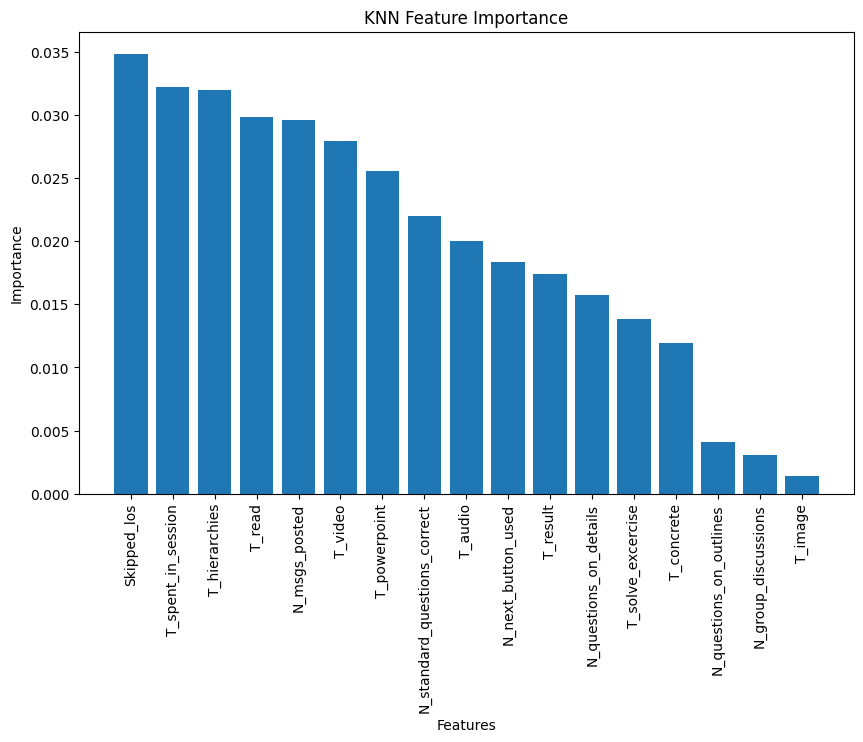

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

# Train the KNN classifier
model = KNeighborsClassifier(algorithm= 'ball_tree', leaf_size= 10, metric= 'euclidean', n_neighbors= 1, p= 1, weights= 'uniform')
model.fit(X_train, y_train)

# Compute permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
sorted_indices = result.importances_mean.argsort()[::-1]
sorted_importances = result.importances_mean[sorted_indices]
feature_names = X.columns[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names, sorted_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('KNN Feature Importance')
plt.show()


In [ ]:
import numpy as np

input_features = [0.4,0,0.2,0.7,0.9,0.5,0.666666667,0.875,0.811764706,0.48,0.25,0.2,1,0.202222222,0.2,0.056,0.124]  # Modify this list based on your feature values

# Reshape the input features to match the shape expected by the classifier
input_features = np.array(input_features).reshape(1, -1)

clf = KNeighborsClassifier(algorithm= 'ball_tree', leaf_size= 10, metric= 'euclidean', n_neighbors= 1, p= 1, weights= 'uniform')

# Fit the classifier to your training data
clf.fit(X_train, y_train)  # Replace X_train_resampled and y_train_resampled with your actual resampled training data

# Predict the target label for the input features
target_label = clf.predict(input_features)

print("Predicted target label:", target_label)

Predicted target label: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

Accuracy of knn 0.8782816229116945
F1 score of logistic knn 0.8813814866019357




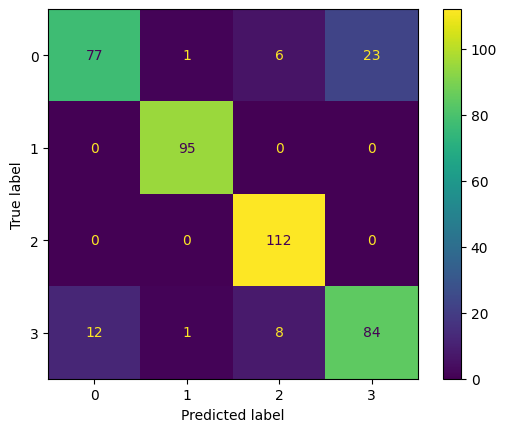

In [ ]:


model = KNeighborsClassifier(algorithm= 'ball_tree', leaf_size= 10, metric= 'euclidean', n_neighbors= 1, p= 1, weights= 'uniform')
model.fit(X_train, y_train)
pred_knn=model.predict(X_test)
score_knn=accuracy_score(y_test,pred_knn)
f1_knn = f1_score(pred_knn, y_test, average="weighted")

print('Accuracy of knn',score_knn)
print('F1 score of logistic knn',f1_knn)
print("\n")

cm = confusion_matrix(y_test, pred_knn, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()